In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('Life Expectancy Data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.isnull().any()

Country                            False
Year                               False
Status                             False
Life_expectancy                     True
Adult_Mortality                     True
infant_deaths                      False
Alcohol                             True
percentage_expenditure             False
Hepatitis_B                         True
Measles                            False
BMI                                 True
under-five_deaths                  False
Polio                               True
Total_expenditure                   True
Diphtheria                          True
HIV/AIDS                           False
GDP                                 True
Population                          True
thinness__1-19_years                True
thinness_5-9_years                  True
Income_composition_of_resources     True
Schooling                           True
dtype: bool

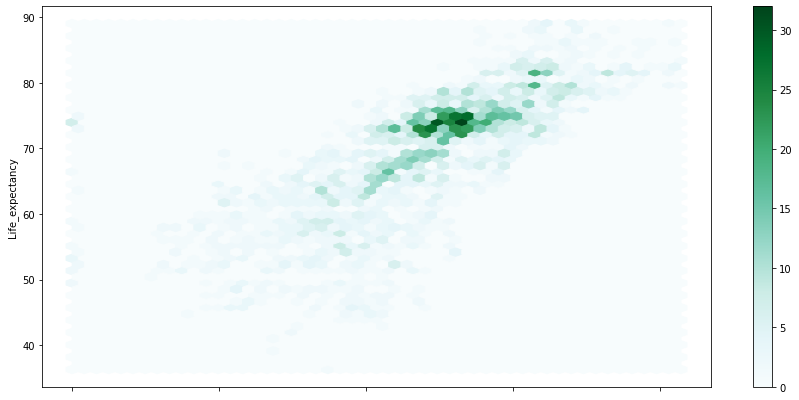

In [10]:
df.plot.hexbin(x='Schooling', y='Life_expectancy', gridsize=50 , figsize=(15,7))

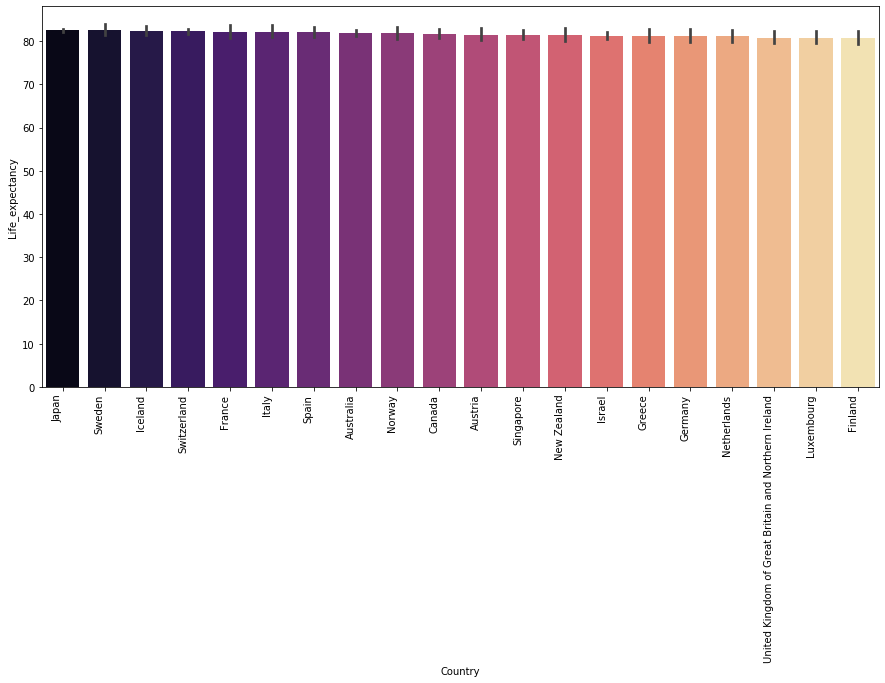

In [8]:
plt.subplots(figsize=(15,7))
order= df.groupby("Country").Life_expectancy.mean().nlargest(20).index
ax = sns.barplot(x="Country", y="Life_expectancy", order = order, palette='magma', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
None


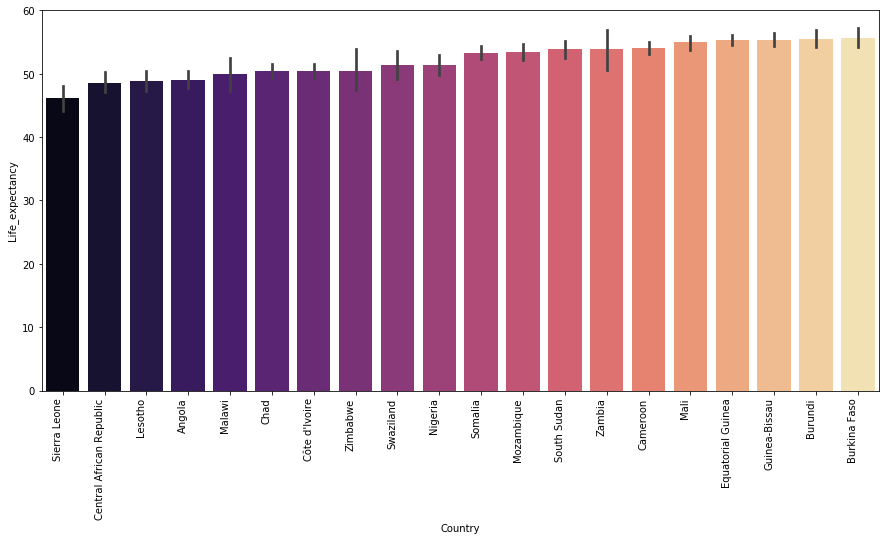

In [9]:
plt.subplots(figsize=(15,7))
order= df.groupby("Country").Life_expectancy.mean().nsmallest(20).index
ax = sns.barplot(x="Country", y="Life_expectancy", order = order, palette='magma', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
None

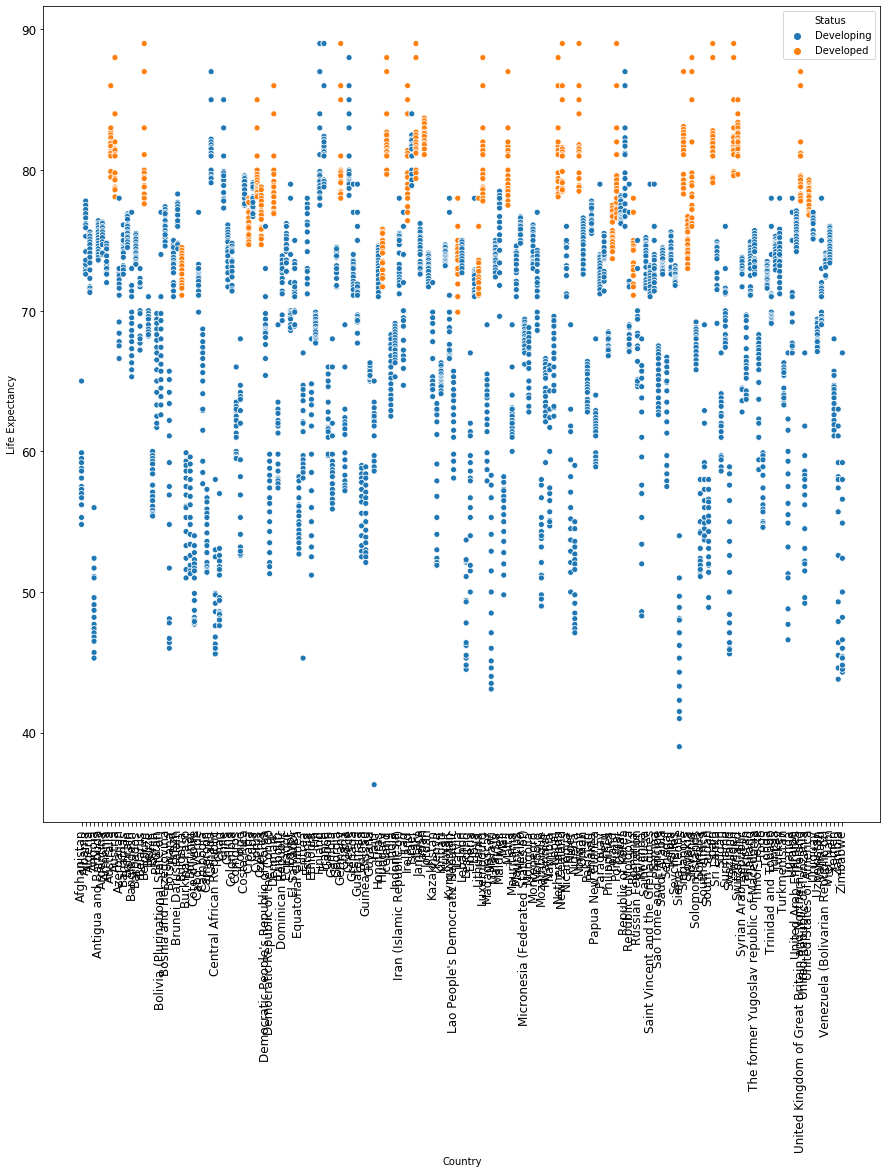

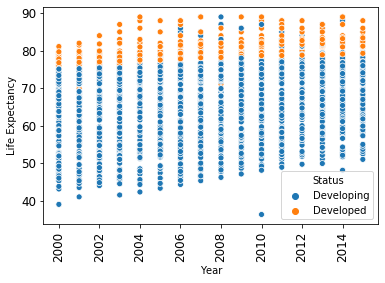

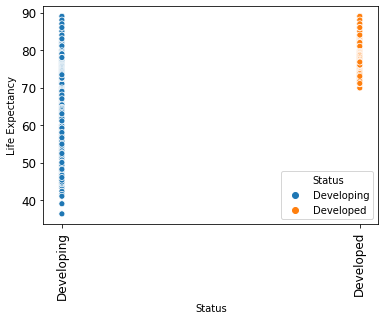

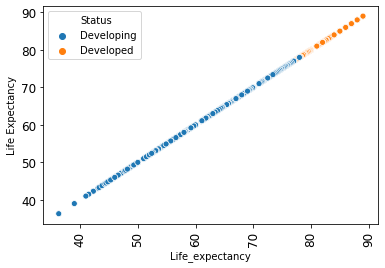

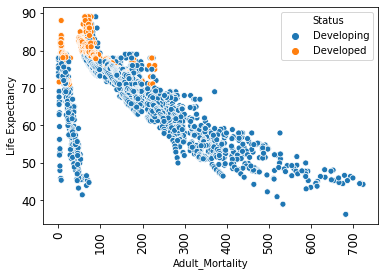

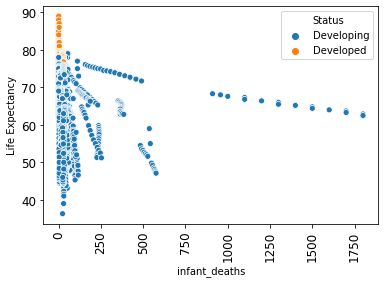

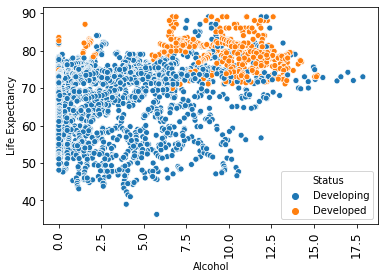

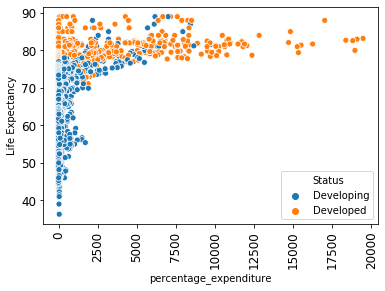

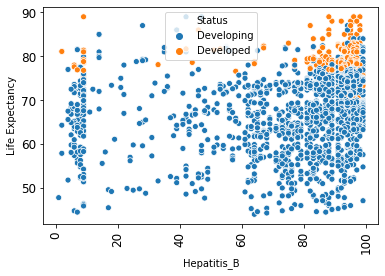

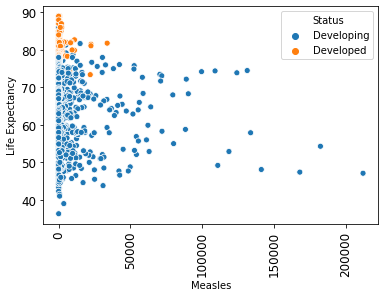

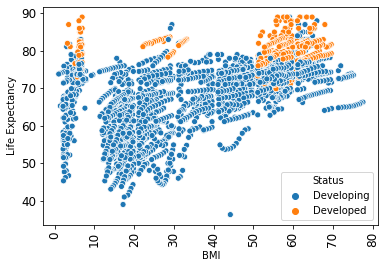

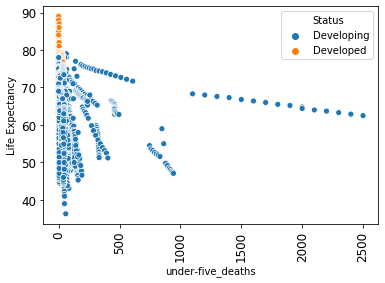

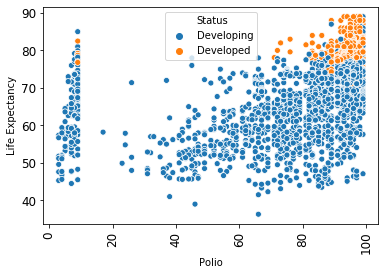

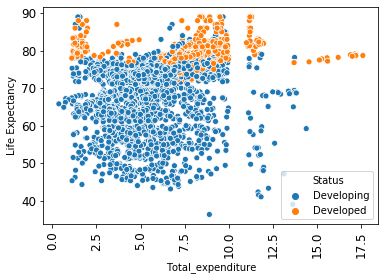

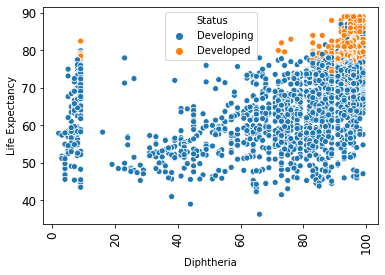

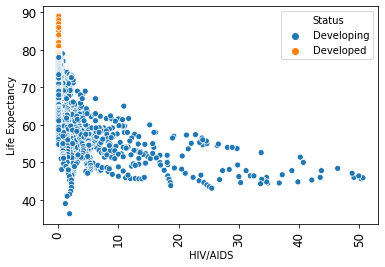

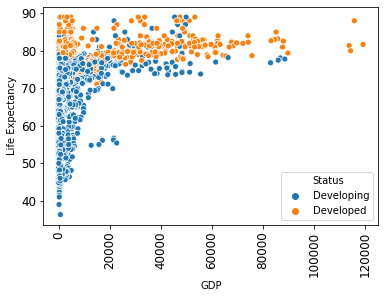

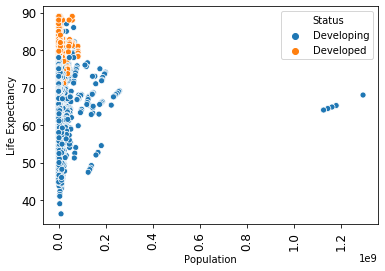

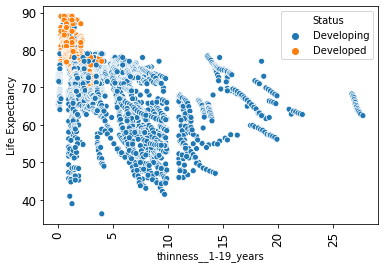

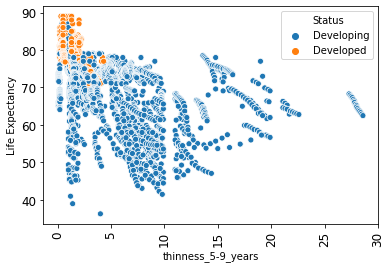

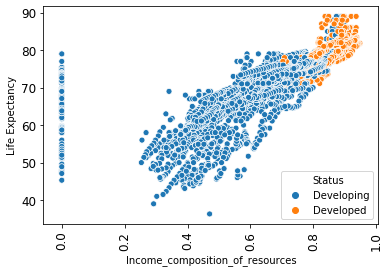

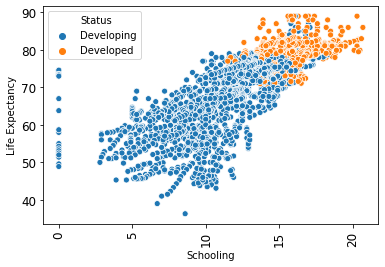

In [14]:
plt.subplots(figsize=(15,15))

for col in df.columns:
    sns.scatterplot(x= df[col], y=df["Life_expectancy"], hue= df["Status"])
    plt.xticks(rotation=90, fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Life Expectancy")
    plt.xlabel(col)
    plt.show()

In [8]:
df.groupby(["Country"])["Life_expectancy"].mean().sort_values(ascending =False).head(10)

Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Canada         81.68750
Name: Life_expectancy, dtype: float64

In [9]:
df.groupby("Country").Life_expectancy.mean().sort_values(ascending =True).head(10)

Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life_expectancy, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019336093988>,
      dtype=object)

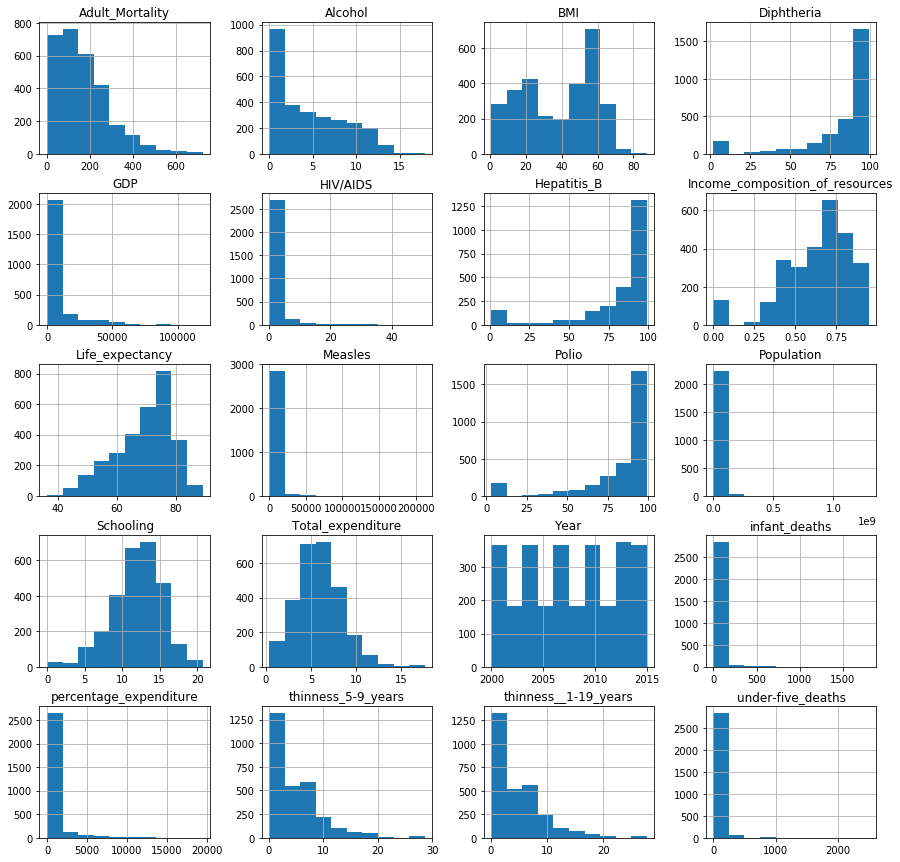

In [10]:
df.hist( figsize=(15,15))

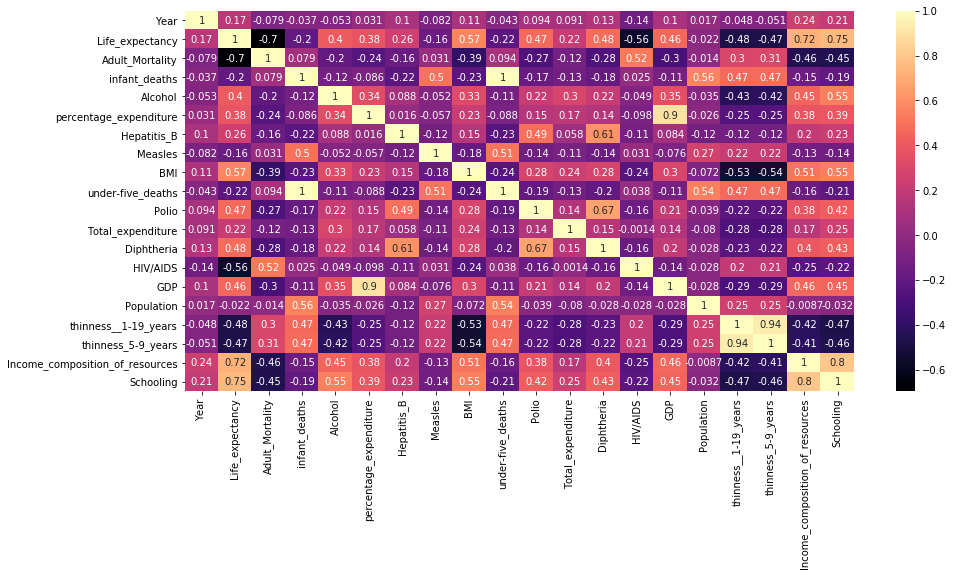

In [6]:
plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap= "magma")